> # Prosper Loan: Probability of Default

## Overview: Credit Risk Modelling 

In the lending industry, investors are willing to accept some degree of risk in their reach for larger return. How much risk are they willing to incur in the event of a borrower's default? **Credit risk modelling** refers to the use of financial models to estimate losses a firm might suffer in the event of a borrower’s default. 


Models from financial intsitutions draw upon

1) The credit history of borrowers, 

2) Third-party data – such as rating agency data – and 

3) Inputs from their own economic stress scenarios...

to measure credit risk.


## Problem Statement
In this project, we are interested in predicting whether an individual will default on his or her loan payment, on the basis of some independent features such as annual income and monthly credit card balance, that characterizes a borrower.

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# expand maximun number of columns and row dosplayed

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [3]:
loan_data = pd.read_csv('prosperLoanData.csv')
#df_descri= pd.read_csv('feature_description.csv')

In [4]:
print("The loan data has {} rows and {} columns respectively".format(loan_data.shape[0], loan_data.shape[1]))
loan_data.head(2)

The loan data has 113937 rows and 81 columns respectively


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
# Displays all column names.
loan_data.columns.values

array(['ListingKey', 'ListingNumber', 'ListingCreationDate',
       'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'FirstRecordedCreditLine',
       'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months',
       'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent',
       'DelinquenciesLast7Years', 'PublicRecordsLast10Years',
       'PublicRecordsLast12Months', 'RevolvingCreditBalance',
       'BankcardUtiliza

In [6]:
# Displays column names, complete (non-missing) cases per column, and datatype per column.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Groups of variables we will be interested in are:
- **Credit history and financial status of borrowers**: IncomeRange, IncomeVerifiable, IsBorrowerHomeowner, CreditScoreRangeLower, CreditScoreRangeUpper, DebtToIncomeRatio and AvailableBankcardCredit

- **Loan characteristics**:  LoanOriginalAmount, Term, LoanOriginationDate, ListingCategory (numeric), BorrowerRate and our target variable LoanStatus

Our objective is to use this information to predict loan default risk.

In [7]:
#select features on credit history and financial status of borrowers
df = loan_data[['IncomeRange','IncomeVerifiable', 'IsBorrowerHomeowner','CreditScoreRangeLower',
                'CreditScoreRangeUpper','DebtToIncomeRatio','AvailableBankcardCredit',
                'EmploymentStatus','LoanStatus','Term','LoanOriginalAmount',
                'LoanOriginationDate','LoanMonthsSinceOrigination','ProsperRating (Alpha)',
                'ProsperScore','BorrowerRate']]

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (113937, 16)


,IncomeRange,IncomeVerifiable,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,AvailableBankcardCredit,EmploymentStatus,LoanStatus,Term,LoanOriginalAmount,LoanOriginationDate,LoanMonthsSinceOrigination,ProsperRating (Alpha),ProsperScore,BorrowerRate
0,"$25,000-49,999",True,True,640.0,659.0,0.17,1500.0,Self-employed,Completed,36,9425,2007-09-12 00:00:00,78,NaN,NaN,0.1580
1,"$50,000-74,999",True,False,680.0,699.0,0.18,10266.0,Employed,Current,36,10000,2014-03-03 00:00:00,0,A,7.0,0.0920
2,Not displayed,True,False,480.0,499.0,0.06,NaN,Not available,Completed,36,3001,2007-01-17 00:00:00,86,NaN,NaN,0.2750
3,"$25,000-49,999",True,True,800.0,819.0,0.15,30754.0,Employed,Current,36,10000,2012-11-01 00:00:00,16,A,9.0,0.0974
4,"$100,000+",True,True,680.0,699.0,0.26,695.0,Employed,Current,36,15000,2013-09-20 00:00:00,6,D,4.0,0.2085


In [8]:
df.dtypes

IncomeRange                    object
IncomeVerifiable                 bool
IsBorrowerHomeowner              bool
CreditScoreRangeLower         float64
CreditScoreRangeUpper         float64
DebtToIncomeRatio             float64
AvailableBankcardCredit       float64
EmploymentStatus               object
LoanStatus                     object
Term                            int64
LoanOriginalAmount              int64
LoanOriginationDate            object
LoanMonthsSinceOrigination      int64
ProsperRating (Alpha)          object
ProsperScore                  float64
BorrowerRate                  float64
dtype: object

In [9]:
df.isnull().any()

IncomeRange                   False
IncomeVerifiable              False
IsBorrowerHomeowner           False
CreditScoreRangeLower          True
CreditScoreRangeUpper          True
DebtToIncomeRatio              True
AvailableBankcardCredit        True
EmploymentStatus               True
LoanStatus                    False
Term                          False
LoanOriginalAmount            False
LoanOriginationDate           False
LoanMonthsSinceOrigination    False
ProsperRating (Alpha)          True
ProsperScore                   True
BorrowerRate                  False
dtype: bool

So features with missing values are respectively:
>CreditScoreRangeLower, CreditScoreRangeUpper, DebtToIncomeRatio, AvailableBankcardCredit, and EmploymentStatus

Steps to general preprocessing

- Covert datatime data types
- Filter data to include only 2012 - 2013 data points
- impute CreditScoreRangeLower and CreditScoreRangeUpper with average value if missing
- Engineer a CreditScoreRange feature
- Borrowers with missing/unknown income verifiable and debt-to-income ratio will be classified as risky. Thus it makes sense to fill np.nan values with text 'unknown'

For our target variable, we dont want current loans. So we will also filter data to exclude this category

## General Preprocessing Part 1

### Filtering 

#### 1) Datetime Variable
Convert datetime variable and create filter of only 2012-2013 data entries

In [10]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate']) #convert data type
df['Year'] = df['LoanOriginationDate'].dt.year #create year column
#df['Month'] = df['LoanOriginationDate'].dt.month


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#filter dataframe
df = df[(df['Year'] == 2012) | (df['Year'] == 2013)] #filter dataframe


### Missing values

In [12]:
df.isnull().any()

IncomeRange                   False
IncomeVerifiable              False
IsBorrowerHomeowner           False
CreditScoreRangeLower         False
CreditScoreRangeUpper         False
DebtToIncomeRatio              True
AvailableBankcardCredit       False
EmploymentStatus              False
LoanStatus                    False
Term                          False
LoanOriginalAmount            False
LoanOriginationDate           False
LoanMonthsSinceOrigination    False
ProsperRating (Alpha)         False
ProsperScore                  False
BorrowerRate                  False
Year                          False
dtype: bool

So we see there are missing values only in DTI ratio feature for 2012-2013 **Debt-to-income ratio (DTI)**. We know From the feature description file, a Null value in this feature indicates that the DTI ratio is not available. 

The best way to handle these missing values will be to put them under a category as 'unknown' in the dti column. So the borrowers with unknown dti will be classified as risky borrowers in our pd-model. We will do this later in our data preparation for our pd-model.

### Engineering Features

> #### CreditScoreRange = CreditScoreRangeUpper - CreditScoreRangeLower


In [13]:
#code
df['CreditScoreRange'] = np.where((df['CreditScoreRangeLower'] >=0) & (df['CreditScoreRangeUpper'] <=299),'Very Poor (0-299)',
            np.where((df['CreditScoreRangeLower']> 299) & (df['CreditScoreRangeUpper']<= 599), 'Poor (300-599)', 
             np.where((df['CreditScoreRangeLower']>599) & (df['CreditScoreRangeUpper'] <=679 ),'Fair (600-679)',
             np.where((df['CreditScoreRangeLower'] >679) & (df['CreditScoreRangeUpper'] <= 739),'Good (680-739)', 
            np.where((df['CreditScoreRangeLower'] > 739) & (df['CreditScoreRangeUpper'] <= 799),'Very Good (740-799)',
            np.where((df['CreditScoreRangeLower'] > 799) & (df['CreditScoreRangeUpper'] > 800),'Exceptional (800+)','others'))))))
            
#test

df['CreditScoreRange'].value_counts()/df.shape[0]

Good (680-739)         0.462837
Fair (600-679)         0.294538
Very Good (740-799)    0.202661
Exceptional (800+)     0.039964
Name: CreditScoreRange, dtype: float64

So we see here that majority of borrowers belong to Good Credit Score Range category, which is a good thing.

### Drop Irrelevant Columns

In [14]:
df = df.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper','LoanOriginationDate',
         'LoanMonthsSinceOrigination','Year'], axis=1)

In [15]:
df.shape

(53898, 13)

### Creating Dummy Variables

In [16]:
df.dtypes

IncomeRange                 object
IncomeVerifiable              bool
IsBorrowerHomeowner           bool
DebtToIncomeRatio          float64
AvailableBankcardCredit    float64
EmploymentStatus            object
LoanStatus                  object
Term                         int64
LoanOriginalAmount           int64
ProsperRating (Alpha)       object
ProsperScore               float64
BorrowerRate               float64
CreditScoreRange            object
dtype: object

In [17]:
df_dummies = [pd.get_dummies(df['IncomeRange'], prefix = 'IncomeRange', prefix_sep = ':'),
                     pd.get_dummies(df['EmploymentStatus'], prefix = 'EmploymentStatus', prefix_sep = ':'),
                     pd.get_dummies(df['CreditScoreRange'], prefix = 'CreditScoreRange', prefix_sep = ':'),
                     pd.get_dummies(df['IncomeVerifiable'], prefix = 'IncomeVerifiable', prefix_sep = ':'),
                     pd.get_dummies(df['IsBorrowerHomeowner'], prefix = 'IsBorrowerHomeowner', prefix_sep = ':'),
                     pd.get_dummies(df['ProsperRating (Alpha)'], prefix = 'ProsperRating (Alpha)', prefix_sep = ':')
                     ]
# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.

In [18]:
df_dummies = pd.concat(df_dummies, axis = 1)
# We concatenate the dummy variables and this turns them into a dataframe.

In [19]:
type(df_dummies)
# Returns the type of the variable.

pandas.core.frame.DataFrame

In [20]:
df = pd.concat([df, df_dummies], axis = 1)
# Concatenates two dataframes.
# Here we concatenate the dataframe with original data with the dataframe with dummy variables, along the columns. 

In [21]:
df.columns.values
# Displays all column names.

array(['IncomeRange', 'IncomeVerifiable', 'IsBorrowerHomeowner',
       'DebtToIncomeRatio', 'AvailableBankcardCredit', 'EmploymentStatus',
       'LoanStatus', 'Term', 'LoanOriginalAmount',
       'ProsperRating (Alpha)', 'ProsperScore', 'BorrowerRate',
       'CreditScoreRange', 'IncomeRange:$0', 'IncomeRange:$1-24,999',
       'IncomeRange:$100,000+', 'IncomeRange:$25,000-49,999',
       'IncomeRange:$50,000-74,999', 'IncomeRange:$75,000-99,999',
       'IncomeRange:Not employed', 'EmploymentStatus:Employed',
       'EmploymentStatus:Full-time', 'EmploymentStatus:Not employed',
       'EmploymentStatus:Other', 'EmploymentStatus:Part-time',
       'EmploymentStatus:Retired', 'EmploymentStatus:Self-employed',
       'CreditScoreRange:Exceptional (800+)',
       'CreditScoreRange:Fair (600-679)',
       'CreditScoreRange:Good (680-739)',
       'CreditScoreRange:Very Good (740-799)', 'IncomeVerifiable:False',
       'IncomeVerifiable:True', 'IsBorrowerHomeowner:False',
       'IsBorrow

In [22]:
df.shape

(53898, 42)

## PD Model

### Data Preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

Indicator whether borrower default or not. What data do we have? Loan_status. The statistical methodology to model PD is a logistic regression where the dependent variable is precisely whether a borrower defaulted or not. 

**How does LogReg work?**

The relation between the Logarithm of odds of an outcome variable and a linear combination of predictors or independent variable. In this project, our outcome variable of interest is the  default or non default event. So 

ln(odds) = linear combination of independent variable.

odds = Non-Default/Default

**Rule**

LogReg model must be easy to apply and interprete as required by the regulator. Thus all independent variables have to be dummy variables.

So let us create our dependent variable, our good and bad, default or non default indicator from Loan status

In [23]:
df['LoanStatus'].unique()
# Displays unique values of a column.

array(['Current', 'Defaulted', 'Completed', 'Chargedoff',
       'Past Due (16-30 days)', 'Past Due (1-15 days)',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'FinalPaymentInProgress', 'Past Due (91-120 days)',
       'Past Due (>120 days)'], dtype=object)

In [24]:
df['LoanStatus'].value_counts()

Current                   41230
Completed                  7815
Chargedoff                 2564
Past Due (1-15 days)        662
Defaulted                   396
Past Due (31-60 days)       318
Past Due (61-90 days)       272
Past Due (91-120 days)      258
Past Due (16-30 days)       223
FinalPaymentInProgress      148
Past Due (>120 days)         12
Name: LoanStatus, dtype: int64

In [25]:
df['LoanStatus'].value_counts() / df['LoanStatus'].count()
# We divide the number of observations for each unique value of a variable by the total number of observations.
#

Current                   0.764963
Completed                 0.144996
Chargedoff                0.047571
Past Due (1-15 days)      0.012282
Defaulted                 0.007347
Past Due (31-60 days)     0.005900
Past Due (61-90 days)     0.005047
Past Due (91-120 days)    0.004787
Past Due (16-30 days)     0.004137
FinalPaymentInProgress    0.002746
Past Due (>120 days)      0.000223
Name: LoanStatus, dtype: float64

By definition, all current loans, completed loans, loans past due for 1-15 days, 16-30 days and loans with FinalPaymentInProgress will be classified as good loans (encoded as 1) while the rest will be bad loans ecoded as 0

In [26]:
# Good/ Bad Definition
df['good_bad'] = np.where(df['LoanStatus'].isin(['Chargedoff', 'Defaulted',
                                                      'Past Due (31-60 days)','Past Due (61-90 days)',
                                                 'Past Due (91-120 days)',
                                                 'Past Due (>120 days)']), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

In [27]:
df['good_bad'].value_counts()/df['good_bad'].count()

1    0.929125
0    0.070875
Name: good_bad, dtype: float64

So we have 92.9% good loans and about 7% bad loans. The proportion of bad loans is quite high and could affect an organization alot by inhibiting cash flow and procuring cost. A good credit risk model is required.

On the other hand, this is an example of imbalanced data, which we will have to deal with later. 

### How does logistic regression work here?

- Access relationship between dependent and independent variables
- estimate regression cofficents: let positive coefficients imply positive behaviours
- We want an easy to interpret model, an example of ease of use is that we want positive coefficients to indicate positive quality, that is higher credit worthiness.

**As an example**

The way we have defined the values 0 (for bad loans) and 1 (for good loans) in the dependent variable of our Probability of Default (PD) model implies that if we ran a regression model and got a positive coefficient for creditscorerange for instance, then it implies that the probability of default decrease with increase in creditscorerange. 

**The greater the value of the independent variable, the lower the probability of default.**

### Splitting data

In [28]:
from sklearn.model_selection import train_test_split
# Imports the libraries we need.

In [29]:
X = df.drop('good_bad', axis = 1)
y = df['good_bad']

In [30]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(X,y )
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.

In [31]:
print("Train data:", loan_data_inputs_train.shape, loan_data_targets_train.shape)
print()
print("Test data:", loan_data_inputs_test.shape, loan_data_targets_test.shape)

Train data: (40423, 42) (40423,)

Test data: (13475, 42) (13475,)


#### Assigning variables for our train data

In [91]:
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train

df_inputs_prepr = loan_data_inputs_test 
df_targets_prepr = loan_data_targets_test 

In [92]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

In [93]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [94]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

### Preprocessing Discrete Variables

IncomeVerifiable, IsBorowerHomeowner, EmploymentStatus, CreditScoreRange, IncomeRasnge, ProsperRating (Alpha)

#### ProsperRating (Alpha)

In [95]:
# 'IncomeVerifiable'
df_temp = woe_discrete(df_inputs_prepr, 'ProsperRating (Alpha)', df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

,ProsperRating (Alpha),n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,HR,1155,0.793074,0.085714,916.0,239.0,0.073245,0.246646,-1.214146,NaN,NaN,0.458397
1,E,1432,0.893855,0.106271,1280.0,152.0,0.102351,0.156863,-0.426964,0.100781,0.787182,0.458397
2,D,2158,0.910565,0.160148,1965.0,193.0,0.157125,0.199174,-0.237142,0.016711,0.189822,0.458397
3,C,3310,0.938369,0.245640,3106.0,204.0,0.248361,0.210526,0.165272,0.027803,0.402414,0.458397
4,B,2591,0.959089,0.192282,2485.0,106.0,0.198705,0.109391,0.596890,0.020721,0.431618,0.458397
5,A,2121,0.970769,0.157403,2059.0,62.0,0.164641,0.063983,0.945142,0.011679,0.348252,0.458397
6,AA,708,0.981638,0.052542,695.0,13.0,0.055573,0.013416,1.421263,0.010870,0.476121,0.458397


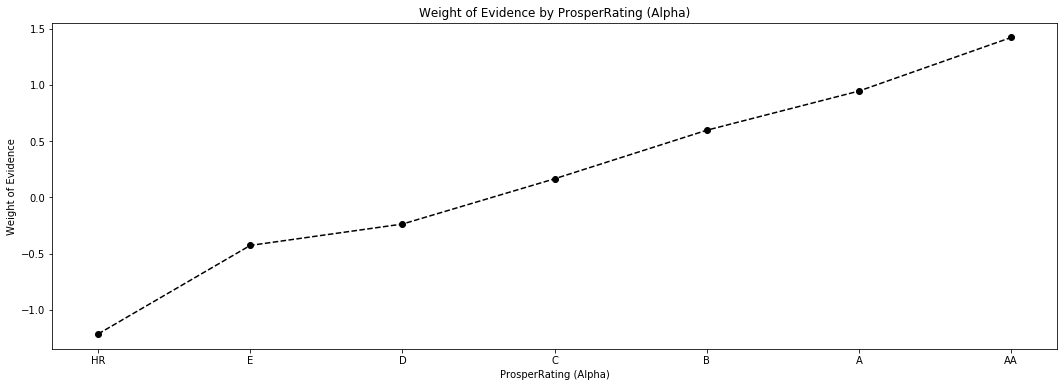

In [96]:
plot_by_woe(df_temp)

Remember that Grade reflects external credit ratings of all variables. It's the one that should have very good patterns on weights of evidence. Indeed, as you can see on the chart, weight of evidence increases almost monotonously with the increase of external credit rating grades from the worst HR to the best AA. Thus the greater the grade, the greater the weight of evidence. That means loans with greater external rating are better on average based on this pattern of weight of evidence. Let's keep the original seven categories of the grade variable as independent variables for the model. 

Let's keep a record of all the dummy variables in a spreadsheet. Since Grade HR has the lowest woe and the worst credit risk so we will use it as referene category.

#### IncomeVerifiable

In [97]:
# 'IncomeVerifiable'
df_temp = woe_discrete(df_inputs_prepr, 'IncomeVerifiable', df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

,IncomeVerifiable,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,False,1073,0.871389,0.079629,935.0,138.0,0.074764,0.142415,-0.644406,NaN,NaN,0.048731
1,True,12402,0.932995,0.920371,11571.0,831.0,0.925236,0.857585,0.075928,0.061606,0.720335,0.048731


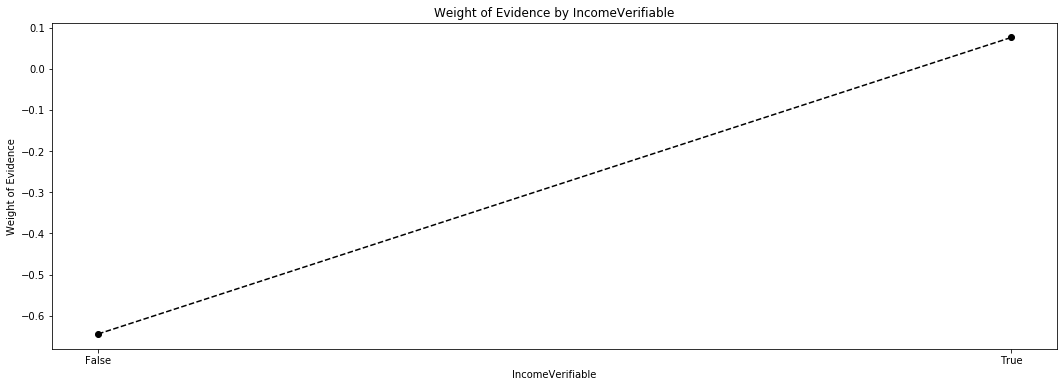

In [98]:
plot_by_woe(df_temp)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

Creating Dummy Variables for IncomeVerifiable

In [99]:
# Leave as is.
# 'False' will be the reference category.
df_inputs_prepr['IncomeVerifiable:True'] = np.where((df_inputs_prepr['IncomeVerifiable'] == True), 1, 0)
df_inputs_prepr['IncomeVerifiable:False'] = np.where((df_inputs_prepr['IncomeVerifiable'] == False), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### IsBorrowerHomeowner

In [100]:
# 'IsBorrowerHomeowner'
df_temp = woe_discrete(df_inputs_prepr, 'IsBorrowerHomeowner', df_targets_prepr)
df_temp

,IsBorrowerHomeowner,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,False,6325,0.922055,0.469388,5832.0,493.0,0.466336,0.508772,-0.087093,NaN,NaN,0.007212
1,True,7150,0.933427,0.530612,6674.0,476.0,0.533664,0.491228,0.082858,0.011371,0.169951,0.007212


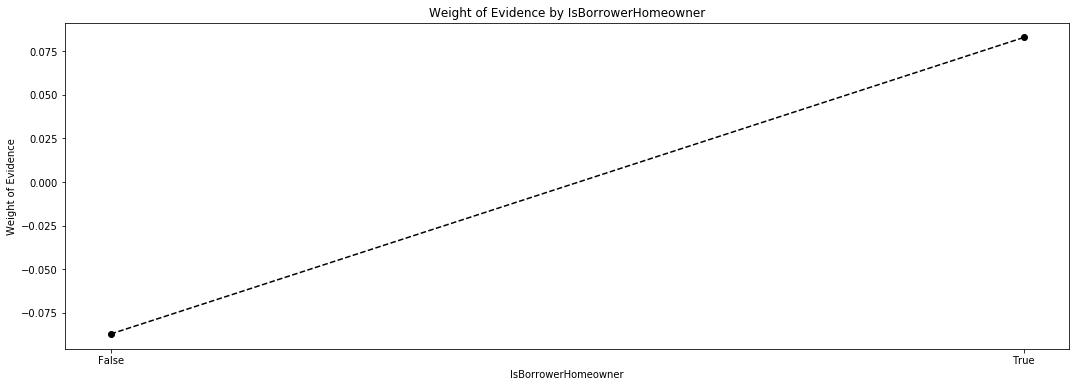

In [101]:
plot_by_woe(df_temp)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

In [102]:
# Leave as is.
# 'False' will be the reference category.
df_inputs_prepr['IsBorrowerHomeowner:True'] = np.where((df_inputs_prepr['IsBorrowerHomeowner'] == True), 1, 0)
df_inputs_prepr['IsBorrowerHomeowner:False'] = np.where((df_inputs_prepr['IsBorrowerHomeowner'] == False), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Income Range

In [103]:
df_temp = woe_discrete(df_inputs_prepr, 'IncomeRange', df_targets_prepr)
df_temp

,IncomeRange,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Not employed,106,0.820755,0.007866,87.0,19.0,0.006957,0.019608,-1.036230,NaN,NaN,0.156416
1,"$1-24,999",695,0.851799,0.051577,592.0,103.0,0.047337,0.106295,-0.808922,0.031044,0.227309,0.156416
2,$0,7,0.857143,0.000519,6.0,1.0,0.000480,0.001032,-0.765940,0.005344,0.042982,0.156416
3,"$25,000-49,999",3765,0.905445,0.279406,3409.0,356.0,0.272589,0.367389,-0.298456,0.048302,0.467484,0.156416
4,"$50,000-74,999",4092,0.935239,0.303673,3827.0,265.0,0.306013,0.273478,0.112407,0.029795,0.410863,0.156416
5,"$75,000-99,999",2450,0.949796,0.181818,2327.0,123.0,0.186071,0.126935,0.382452,0.014556,0.270044,0.156416
6,"$100,000+",2360,0.956780,0.175139,2258.0,102.0,0.180553,0.105263,0.539563,0.006984,0.157111,0.156416


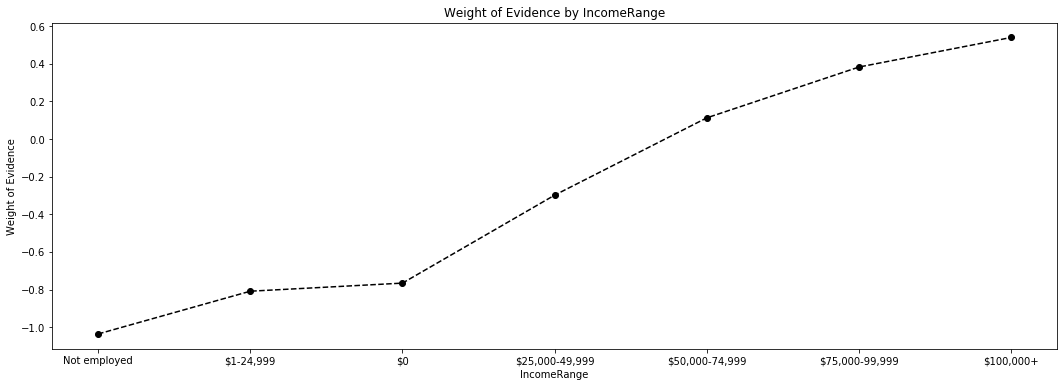

In [104]:
plot_by_woe(df_temp)

Leave as it is

#### CreditScoreRange

In [105]:
# 'CreditScoreRange'
df_temp = woe_discrete(df_inputs_prepr, 'CreditScoreRange', df_targets_prepr)
df_temp

,CreditScoreRange,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Fair (600-679),3946,0.911809,0.292839,3598.0,348.0,0.287702,0.359133,-0.221768,NaN,NaN,0.037831
1,Good (680-739),6246,0.929555,0.463525,5806.0,440.0,0.464257,0.454076,0.022173,0.017745,0.243941,0.037831
2,Very Good (740-799),2771,0.941898,0.205640,2610.0,161.0,0.208700,0.166151,0.228002,0.012343,0.205829,0.037831
3,Exceptional (800+),512,0.960938,0.037996,492.0,20.0,0.039341,0.020640,0.645047,0.019039,0.417045,0.037831


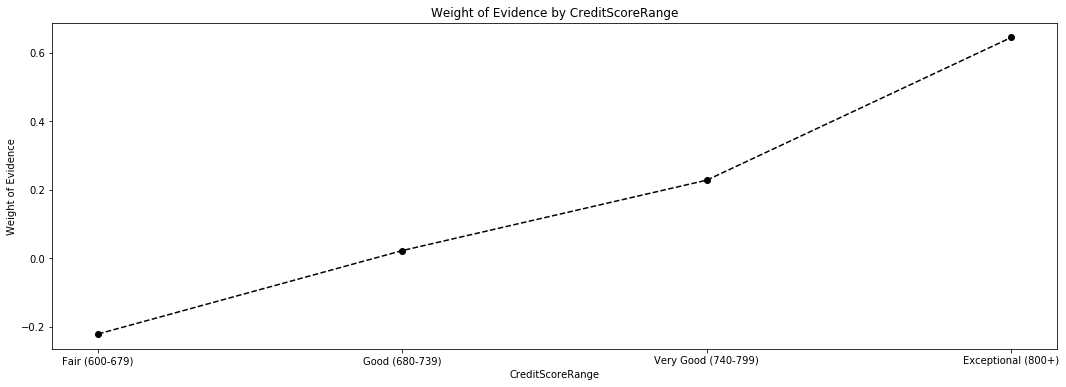

In [106]:
plot_by_woe(df_temp)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

Credit score range looks good too so we leave as it is and have fair(600-679) as reference category

#### Employment Status

In [107]:
df_temp = woe_discrete(df_inputs_prepr, 'EmploymentStatus', df_targets_prepr)
df_temp

,EmploymentStatus,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Part-time,9,0.777778,0.000668,7.0,2.0,0.000560,0.002064,-1.304936,NaN,NaN,0.038409
1,Not employed,106,0.820755,0.007866,87.0,19.0,0.006957,0.019608,-1.036230,0.042977,0.268706,0.038409
2,Retired,23,0.826087,0.001707,19.0,4.0,0.001519,0.004128,-0.999555,0.005332,0.036675,0.038409
3,Other,692,0.897399,0.051354,621.0,71.0,0.049656,0.073271,-0.389048,0.071312,0.610507,0.038409
4,Self-employed,672,0.901786,0.049870,606.0,66.0,0.048457,0.068111,-0.340474,0.004387,0.048574,0.038409
5,Full-time,319,0.921630,0.023673,294.0,25.0,0.023509,0.025800,-0.092995,0.019844,0.247479,0.038409
6,Employed,11654,0.932899,0.864861,10872.0,782.0,0.869343,0.807018,0.074392,0.011268,0.167387,0.038409


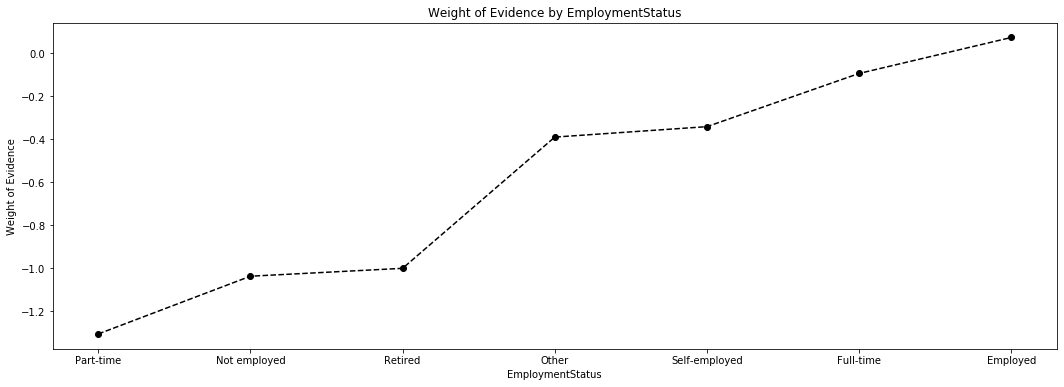

In [108]:
plot_by_woe(df_temp)

- Employed has too many observations compared to other categories so we leave it in a seperaate category.
- Not employed, part-time and retired will be under the same category and set as refernce category.
- Self_employed, other, and full-time will be in the same category

So that makes three categories in total.
Grouping the dummy variables

In [109]:
# We combine ''EmploymentStatus:Other'', 'EmploymentStatus:Self-employed', 'EmploymentStatus:Not employed.
# We combine 'EmploymentStatus:Retired', 'EmploymentStatus:retired_fulltime'.
# We leave 'employed' in a separate category.
# We leave 'part=time' in a separate category.
# 'EmploymentStatus:Part-time' will be the reference category.
df_inputs_prepr['EmploymentStatus:Other__self_employed__full_time'] = sum([df_inputs_prepr['EmploymentStatus:Other'], df_inputs_prepr['EmploymentStatus:Self-employed'],
                                                                            df_inputs_prepr['EmploymentStatus:Full-time']])
df_inputs_prepr['EmploymentStatus:Not_employed__part_time__retired'] = sum([df_inputs_prepr['EmploymentStatus:Retired'], df_inputs_prepr['EmploymentStatus:Part-time'],
                                                                            df_inputs_prepr['EmploymentStatus:Not employed']])
                                             

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### Preprocessing continuous variables: creating dummy variables

The continuous variable in our dataset are
'DebtToIncomeRatio', 'AvailableBankcardCredit', 'Term', 'LoanOriginalAmount', 'ProsperScore',
 and 'BorrowerRate'
       

Recall we fine classed the discrete variables by creating dummy variables, then we coarsed. In this section for our continuos variables, we will fine-class using the cut method. 

#### Term

In [110]:
df_temp = woe_ordered_continuous(df_inputs_prepr,'Term',df_targets_prepr)
df_temp

,Term,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,12,251,0.944223,0.018627,237.0,14.0,0.018951,0.014448,0.271304,NaN,NaN,0.003996
1,36,8287,0.925063,0.614991,7666.0,621.0,0.612986,0.640867,-0.044480,0.019160,0.315784,0.003996
2,60,4937,0.932348,0.366382,4603.0,334.0,0.368063,0.344685,0.065623,0.007284,0.110103,0.003996


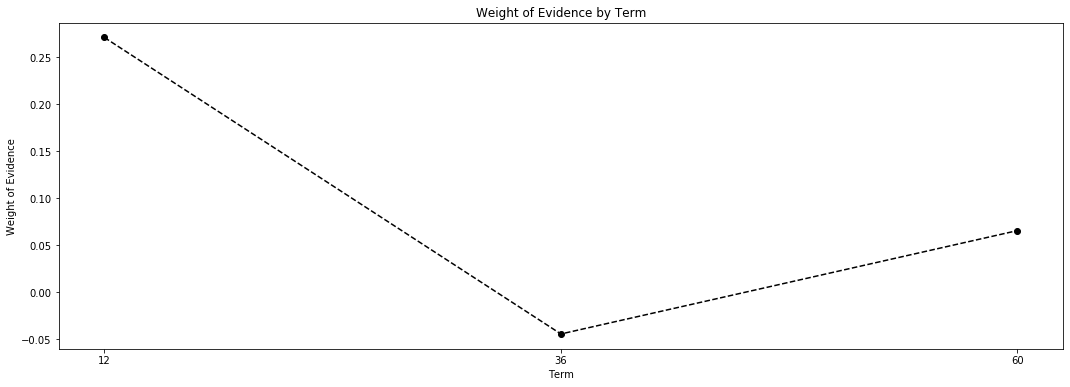

In [111]:
plot_by_woe(df_temp)

In [112]:
#leave as it is
#60Month is the riskiest so set as reference
#creating the dummy variables, 1 and 0
df_inputs_prepr['Term:12'] = np.where((df_inputs_prepr['Term'] == 12),1,0)
df_inputs_prepr['Term:36'] = np.where((df_inputs_prepr['Term'] == 36),1,0)
df_inputs_prepr['Term:60'] = np.where((df_inputs_prepr['Term'] == 60),1,0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

#### ProsperScore

In [113]:
df_temp = woe_ordered_continuous(df_inputs_prepr,'ProsperScore',df_targets_prepr)
df_temp

,ProsperScore,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1.0,113,0.752212,0.008386,85.0,28.0,0.006797,0.028896,-1.447252,NaN,NaN,inf
1,2.0,1060,0.898113,0.078664,952.0,108.0,0.076123,0.111455,-0.381265,0.145901,1.065987,inf
2,3.0,1435,0.935889,0.106494,1343.0,92.0,0.107388,0.094943,0.123173,0.037775,0.504439,inf
3,4.0,2093,0.938844,0.155325,1965.0,128.0,0.157125,0.132095,0.173518,0.002955,0.050345,inf
4,5.0,1665,0.902703,0.123562,1503.0,162.0,0.120182,0.167183,-0.330077,0.036141,0.503595,inf
5,6.0,2048,0.916016,0.151985,1876.0,172.0,0.150008,0.177503,-0.168297,0.013313,0.161781,inf
6,7.0,1736,0.927419,0.128831,1610.0,126.0,0.128738,0.130031,-0.009992,0.011404,0.158305,inf
7,8.0,1665,0.931532,0.123562,1551.0,114.0,0.124020,0.117647,0.052758,0.004112,0.062749,inf
8,9.0,821,0.958587,0.060928,787.0,34.0,0.062930,0.035088,0.584169,0.027056,0.531411,inf
9,10.0,652,0.992331,0.048386,647.0,5.0,0.051735,0.005160,2.305209,0.033744,1.721041,inf


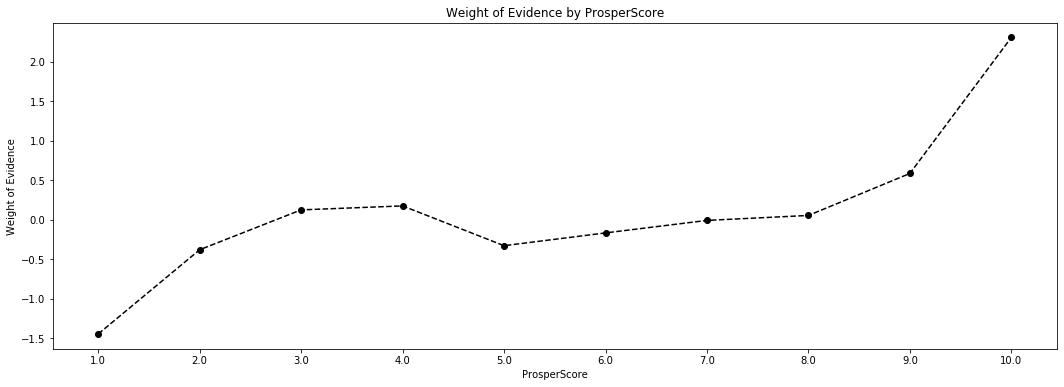

In [114]:
plot_by_woe(df_temp)

- Set ProsperScore 1 as reference category and it should be on its own catgeory. 


In [115]:
#creating the dummy variables, 1 and 0
# Categories:1.0-3.0, 4.0-8.0, 9.0-11.0
df_inputs_prepr['ProsperScore:1'] = np.where(df_inputs_prepr['ProsperScore'].isin([1]),1,0)
df_inputs_prepr['ProsperScore:2-5'] = np.where(df_inputs_prepr['ProsperScore'].isin(range(2,6)),1,0)
df_inputs_prepr['ProsperScore:6-8'] = np.where(df_inputs_prepr['ProsperScore'].isin(range(6,9)),1,0)
df_inputs_prepr['ProsperScore:9-11'] = np.where(df_inputs_prepr['ProsperScore'].isin(range(9,12)),1,0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

#### BorrowerRate

In [116]:
df_inputs_prepr['BorrowerRate'].max()

0.3304

In [117]:
# int_rate
df_inputs_prepr['BorrowerRateFactor'] = pd.cut(df_inputs_prepr['BorrowerRate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [118]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'BorrowerRateFactor', df_targets_prepr)
# We calculate weight of evidence.
df_temp.head()

,BorrowerRateFactor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.0562, 0.062]",68,1.000000,0.005046,68.0,0.0,0.005437,0.000000,inf,NaN,NaN,inf
1,"(0.062, 0.0675]",98,0.989796,0.007273,97.0,1.0,0.007756,0.001032,2.017012,0.010204,inf,inf
2,"(0.0675, 0.0729]",62,0.983871,0.004601,61.0,1.0,0.004878,0.001032,1.553175,0.005925,0.463837,inf
3,"(0.0729, 0.0784]",139,0.978417,0.010315,136.0,3.0,0.010875,0.003096,1.256343,0.005454,0.296831,inf
4,"(0.0784, 0.0839]",115,1.000000,0.008534,115.0,0.0,0.009196,0.000000,inf,0.021583,inf,inf


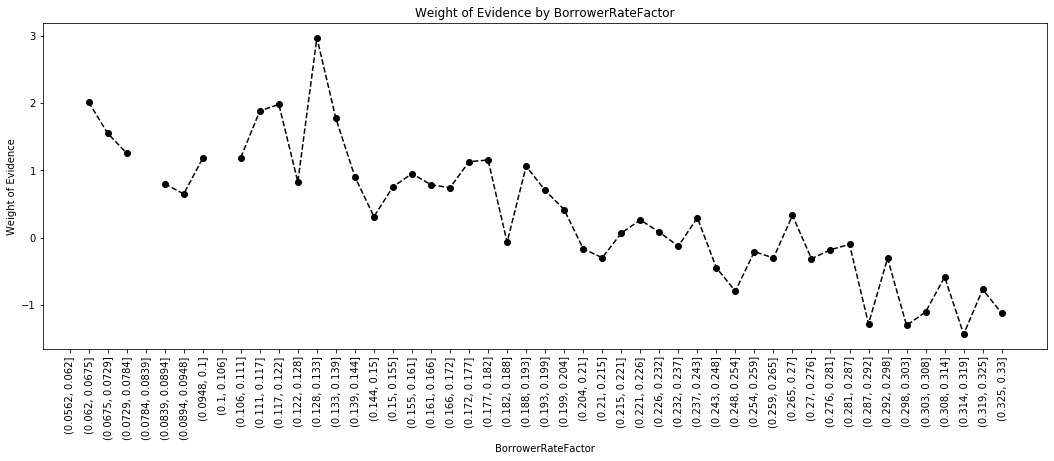

In [119]:
plot_by_woe(df_temp, 90)

In [120]:
df_inputs_prepr['BorrowerRate:<0.111'] = np.where((df_inputs_prepr['BorrowerRate'] <= 0.111), 1, 0)
df_inputs_prepr['BorrowerRate:0.111, 0.188'] = np.where((df_inputs_prepr['BorrowerRate'] > 0.111) & (df_inputs_prepr['BorrowerRate'] <= 0.188), 1, 0)
df_inputs_prepr['BorrowerRate:0.188, 0.243'] = np.where((df_inputs_prepr['BorrowerRate'] > 0.188) & (df_inputs_prepr['BorrowerRate'] <= 0.243), 1, 0)
df_inputs_prepr['BorrowerRate:0.243-0.292'] = np.where((df_inputs_prepr['BorrowerRate'] > 0.243) & (df_inputs_prepr['BorrowerRate'] <= 0.292), 1, 0)
df_inputs_prepr['BorrowerRate:>0.292'] = np.where((df_inputs_prepr['BorrowerRate'] > 0.292), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

#### LoanOriginalAmount

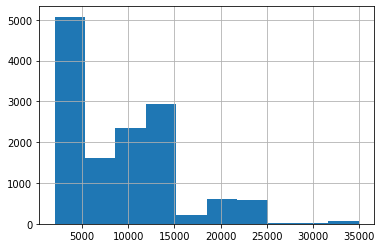

In [121]:
df_inputs_prepr['LoanOriginalAmount'].hist()

Let us split the LoanOriginalAmount category to include values > 5000 and <= 5000

In [122]:
# funded_amnt
df_inputs_prepr['LoanOriginalAmountFactor'] = pd.cut(df_inputs_prepr[df_inputs_prepr['LoanOriginalAmount']<=5000]['LoanOriginalAmount'], 10)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'LoanOriginalAmountFactor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LoanOriginalAmountFactor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1997.0, 2300.0]",719,0.891516,0.141899,641.0,78.0,0.142192,0.139535,0.018861,NaN,NaN,inf
1,"(2300.0, 2600.0]",249,0.915663,0.049142,228.0,21.0,0.050577,0.037567,0.297364,0.024147,0.278503,inf
2,"(2600.0, 2900.0]",30,0.833333,0.005921,25.0,5.0,0.005546,0.008945,-0.478021,0.082329,0.775385,inf
3,"(2900.0, 3200.0]",547,0.901280,0.107953,493.0,54.0,0.109361,0.096601,0.124066,0.067946,0.602087,inf
4,"(3200.0, 3500.0]",257,0.926070,0.050720,238.0,19.0,0.052795,0.033989,0.440372,0.024790,0.316307,inf
5,"(3500.0, 3800.0]",35,0.914286,0.006907,32.0,3.0,0.007098,0.005367,0.279664,0.011784,0.160708,inf
6,"(3800.0, 4100.0]",2541,0.873278,0.501480,2219.0,322.0,0.492236,0.576029,-0.157199,0.041007,0.436863,inf
7,"(4100.0, 4400.0]",21,1.000000,0.004144,21.0,0.0,0.004658,0.000000,inf,0.126722,inf,inf
8,"(4400.0, 4700.0]",156,0.878205,0.030787,137.0,19.0,0.030390,0.033989,-0.111917,0.121795,inf,inf
9,"(4700.0, 5000.0]",512,0.925781,0.101046,474.0,38.0,0.105146,0.067979,0.436162,0.047576,0.548079,inf


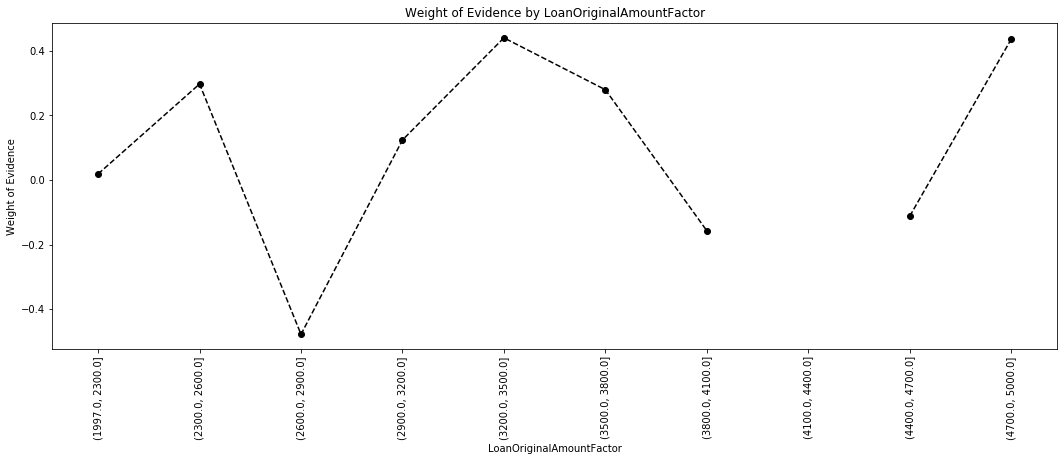

In [123]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [124]:
# funded_amnt
df_inputs_prepr['LoanOriginalAmountFactor'] = pd.cut(df_inputs_prepr[df_inputs_prepr['LoanOriginalAmount']>5000]['LoanOriginalAmount'], 10)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'LoanOriginalAmountFactor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,LoanOriginalAmountFactor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5070.1, 8090.0]",1450,0.946897,0.172455,1373.0,77.0,0.171668,0.187805,-0.089842,NaN,NaN,inf
1,"(8090.0, 11080.0]",2404,0.951747,0.285918,2288.0,116.0,0.286072,0.282927,0.011054,0.004851,0.100895,inf
2,"(11080.0, 14070.0]",905,0.938122,0.107636,849.0,56.0,0.106152,0.136585,-0.252082,0.013626,0.263136,inf
3,"(14070.0, 17060.0]",2237,0.948145,0.266056,2121.0,116.0,0.265191,0.282927,-0.064737,0.010023,0.187345,inf
4,"(17060.0, 20050.0]",660,0.977273,0.078497,645.0,15.0,0.080645,0.036585,0.790410,0.029128,0.855147,inf
5,"(20050.0, 23040.0]",112,0.946429,0.013321,106.0,6.0,0.013253,0.014634,-0.099110,0.030844,0.889520,inf
6,"(23040.0, 26030.0]",531,0.956685,0.063154,508.0,23.0,0.063516,0.056098,0.124198,0.010257,0.223308,inf
7,"(26030.0, 29020.0]",10,1.000000,0.001189,10.0,0.0,0.001250,0.000000,inf,0.043315,inf,inf
8,"(29020.0, 32010.0]",25,1.000000,0.002973,25.0,0.0,0.003126,0.000000,inf,0.000000,NaN,inf
9,"(32010.0, 35000.0]",74,0.986486,0.008801,73.0,1.0,0.009127,0.002439,1.319670,0.013514,inf,inf


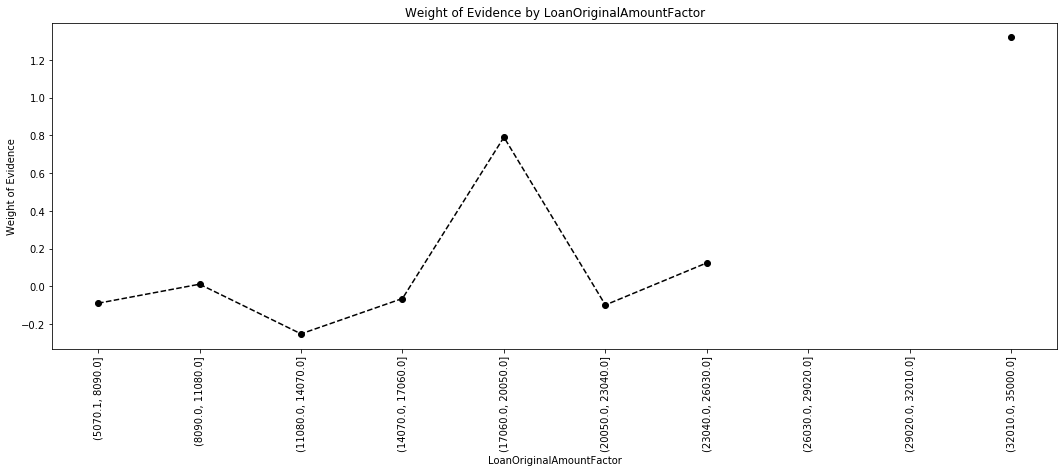

In [125]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

From the figure above, we see an outlier at loan about > 30000 with very few count. Similarly, there are no borrowers requesting for loan amount between 25,000-30,000. This could account for the gap in the WOE chart abve.

Hence, we are going to have one category for more than more than 25K, and we are going to apply our approach to determine the categories of everyone with 25k or less.



In [126]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['LoanOriginalAmount'] <= 25000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [127]:
df_inputs_prepr_temp["LoanOriginalAmount"] = pd.cut(df_inputs_prepr_temp['LoanOriginalAmount'], 30)
# Here we do fine-classing: using the 'cut' method, we split the variable into 30 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'LoanOriginalAmount', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LoanOriginalAmount,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1977.0, 2766.667]",977,0.896622,0.073118,876.0,101.0,0.070679,0.104339,-0.389490,NaN,NaN,inf
1,"(2766.667, 3533.333]",826,0.907990,0.061817,750.0,76.0,0.060513,0.078512,-0.260396,0.011368,0.129094,inf
2,"(3533.333, 4300.0]",2591,0.874566,0.193908,2266.0,325.0,0.182830,0.335744,-0.607789,0.033425,0.347394,inf
3,"(4300.0, 5066.667]",673,0.915305,0.050367,616.0,57.0,0.049701,0.058884,-0.169540,0.040739,0.438249,inf
4,"(5066.667, 5833.333]",128,0.960938,0.009579,123.0,5.0,0.009924,0.005165,0.653011,0.045633,0.822551,inf


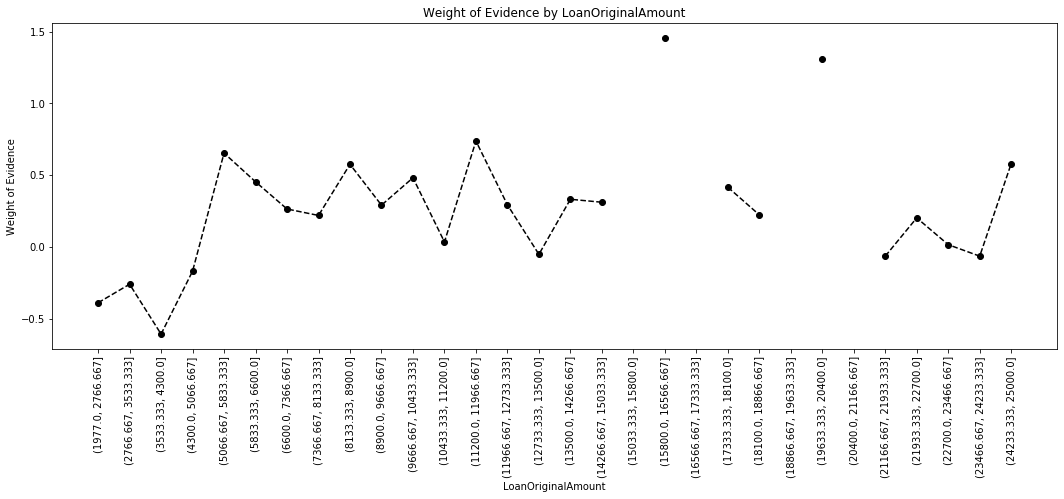

In [128]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [129]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['LoanOriginalAmount:<7.5K'] = np.where((df_inputs_prepr['LoanOriginalAmount'] <= 7400), 1, 0)
df_inputs_prepr['LoanOriginalAmount:7.5K-15K'] = np.where((df_inputs_prepr['LoanOriginalAmount'] > 7400) & (df_inputs_prepr['LoanOriginalAmount'] <= 15050), 1, 0)
df_inputs_prepr['LoanOriginalAmount:15K-20.4K'] = np.where((df_inputs_prepr['LoanOriginalAmount'] > 15050) & (df_inputs_prepr['LoanOriginalAmount'] <= 20400), 1, 0)
df_inputs_prepr['LoanOriginalAmount:20.4K-24.3k'] = np.where((df_inputs_prepr['LoanOriginalAmount'] > 20400) & (df_inputs_prepr['LoanOriginalAmount'] <= 24300), 1, 0)
df_inputs_prepr['LoanOriginalAmount>24.3k'] = np.where((df_inputs_prepr['LoanOriginalAmount'] > 24300),1,0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

#### DebtToIncomeRatio

We have to create one category for missing values and do fine and coarse classing for the rest. more people in (0.0, 0.343] category.

In [130]:
# funded_amnt
df_inputs_prepr['DebtToIncomeRatioFactor'] = pd.cut(df_inputs_prepr['DebtToIncomeRatio'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'DebtToIncomeRatioFactor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,DebtToIncomeRatioFactor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.0, 0.21]",5451,0.929004,0.439243,5064.0,387.0,0.437343,0.465704,-0.062831,NaN,NaN,inf
1,"(0.21, 0.41]",5612,0.944227,0.452216,5299.0,313.0,0.457639,0.376655,0.194752,0.015223,0.257583,inf
2,"(0.41, 0.61]",1113,0.913747,0.089686,1017.0,96.0,0.087831,0.115523,-0.274054,0.030480,0.468806,inf
3,"(0.61, 0.81]",135,0.814815,0.010878,110.0,25.0,0.009500,0.030084,-1.152714,0.098932,0.878660,inf
4,"(0.81, 1.01]",40,0.950000,0.003223,38.0,2.0,0.003282,0.002407,0.310120,0.135185,1.462834,inf
5,"(1.01, 1.21]",16,0.812500,0.001289,13.0,3.0,0.001123,0.003610,-1.167982,0.137500,1.478102,inf
6,"(1.21, 1.41]",9,0.888889,0.000725,8.0,1.0,0.000691,0.001203,-0.554877,0.076389,0.613104,inf
7,"(1.41, 1.61]",6,1.000000,0.000483,6.0,0.0,0.000518,0.000000,inf,0.111111,inf,inf
8,"(1.61, 1.81]",3,1.000000,0.000242,3.0,0.0,0.000259,0.000000,inf,0.000000,NaN,inf
9,"(1.81, 2.01]",1,1.000000,0.000081,1.0,0.0,0.000086,0.000000,inf,0.000000,NaN,inf


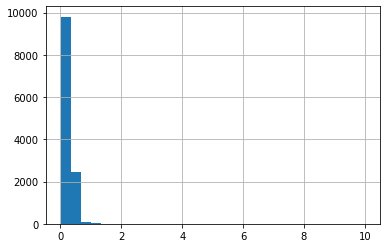

In [131]:
df_inputs_prepr['DebtToIncomeRatio'].hist(bins=30);

In [132]:
df['DebtToIncomeRatio'].isnull().sum()

4240

In [133]:
df['DebtToIncomeRatio'].describe()

count    49658.000000
mean         0.264203
std          0.337311
min          0.000000
25%          0.160000
50%          0.230000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

In [134]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['DebtToIncomeRatio'])]
df_inputs_prepr_temp  = df_inputs_prepr_temp.loc[df_inputs_prepr_temp['DebtToIncomeRatio'] <= 0.4, : ]
df_inputs_prepr_temp['DebtToIncomeRatio'] = pd.cut(df_inputs_prepr_temp['DebtToIncomeRatio'], 30)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'DebtToIncomeRatio', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

,DebtToIncomeRatio,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.00961, 0.023]",28,0.928571,0.002562,26.0,2.0,0.002539,0.002899,-0.132514,NaN,NaN,0.063354
1,"(0.023, 0.036]",39,0.897436,0.003568,35.0,4.0,0.003418,0.005797,-0.528409,0.031136,0.395896,0.063354
2,"(0.036, 0.049]",66,0.863636,0.006038,57.0,9.0,0.005566,0.013043,-0.851636,0.033800,0.323227,0.063354
3,"(0.049, 0.062]",215,0.948837,0.019669,204.0,11.0,0.019920,0.015942,0.222762,0.085201,1.074398,0.063354
4,"(0.062, 0.075]",169,0.923077,0.015461,156.0,13.0,0.015233,0.018841,-0.212556,0.025760,0.435318,0.063354


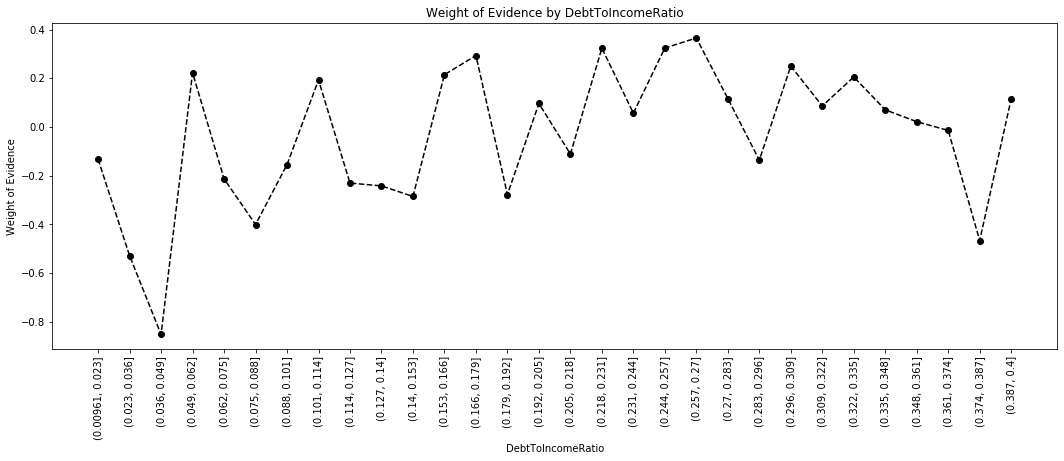

In [135]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [136]:
df_inputs_prepr['DebtToIncomeRatio:Missing'] = np.where((df_inputs_prepr['DebtToIncomeRatio'].isnull()), 1, 0)
df_inputs_prepr['DebtToIncomeRatio:<0.088'] = np.where((df_inputs_prepr['DebtToIncomeRatio'] <= 0.088), 1, 0)
df_inputs_prepr['DebtToIncomeRatio:0.088-0.244'] = np.where((df_inputs_prepr['DebtToIncomeRatio'] > 0.088) & (df_inputs_prepr['DebtToIncomeRatio'] <= 0.244), 1, 0)
df_inputs_prepr['DebtToIncomeRatio:0.244-0.296'] = np.where((df_inputs_prepr['DebtToIncomeRatio'] > 0.244) & (df_inputs_prepr['DebtToIncomeRatio'] <= 0.296), 1, 0)
df_inputs_prepr['DebtToIncomeRatio:0.296-0.4'] = np.where((df_inputs_prepr['DebtToIncomeRatio'] > 0.296) & (df_inputs_prepr['DebtToIncomeRatio'] <= 0.4), 1, 0)
df_inputs_prepr['DebtToIncomeRatio>0.4'] = np.where((df_inputs_prepr['DebtToIncomeRatio'] > 0.4),1,0)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

#### AvailableBankcardCredit

In [137]:
df_inputs_prepr['AvailableBankcardCreditFactor'] = pd.cut(df_inputs_prepr['AvailableBankcardCredit'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'AvailableBankcardCreditFactor', df_targets_prepr)
# We calculate weight of evidence.
df_temp.head()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,AvailableBankcardCreditFactor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-360.0, 7200.0]",8138,0.918162,0.603933,7472.0,666.0,0.597473,0.687307,-0.140071,NaN,NaN,inf
1,"(7200.0, 14400.0]",2051,0.933691,0.152208,1915.0,136.0,0.153126,0.140351,0.087119,0.015529,0.227190,inf
2,"(14400.0, 21600.0]",1105,0.944796,0.082004,1044.0,61.0,0.083480,0.062951,0.282242,0.011105,0.195123,inf
3,"(21600.0, 28800.0]",728,0.950549,0.054026,692.0,36.0,0.055333,0.037152,0.398368,0.005753,0.116126,inf
4,"(28800.0, 36000.0]",461,0.954447,0.034212,440.0,21.0,0.035183,0.021672,0.484553,0.003897,0.086185,inf


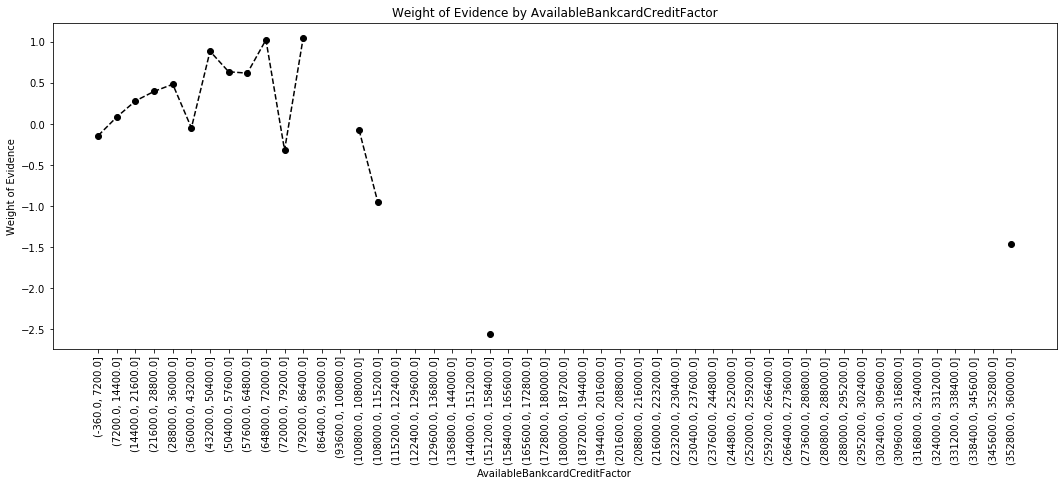

In [138]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

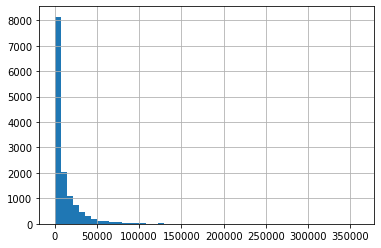

In [139]:
df_inputs_prepr['AvailableBankcardCredit'].hist(bins=50);

In [140]:
df['AvailableBankcardCredit'].describe()

count     53898.000000
mean      11177.494731
std       18200.642357
min           0.000000
25%        1186.000000
50%        4540.000000
75%       13605.000000
max      498374.000000
Name: AvailableBankcardCredit, dtype: float64

we will create a category for outlier values>

In [141]:
df_inputs_prepr_temp  = df_inputs_prepr.loc[df_inputs_prepr['AvailableBankcardCredit'] <= 30000, : ]
df_inputs_prepr_temp['AvailableBankcardCredit'] = pd.cut(df_inputs_prepr_temp['AvailableBankcardCredit'], 60)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'AvailableBankcardCredit', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AvailableBankcardCredit,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-29.98, 499.667]",2056,0.883268,0.169679,1816.0,240.0,0.161940,0.265781,-0.495443,NaN,NaN,0.152744
1,"(499.667, 999.333]",1038,0.916185,0.085665,951.0,87.0,0.084805,0.096346,-0.127590,0.032916,0.367853,0.152744
2,"(999.333, 1499.0]",698,0.916905,0.057605,640.0,58.0,0.057072,0.064230,-0.118171,0.000720,0.009419,0.152744
3,"(1499.0, 1998.667]",662,0.930514,0.054634,616.0,46.0,0.054931,0.050941,0.075410,0.013608,0.193580,0.152744
4,"(1998.667, 2498.333]",544,0.926471,0.044896,504.0,40.0,0.044944,0.044297,0.014501,0.004043,0.060909,0.152744


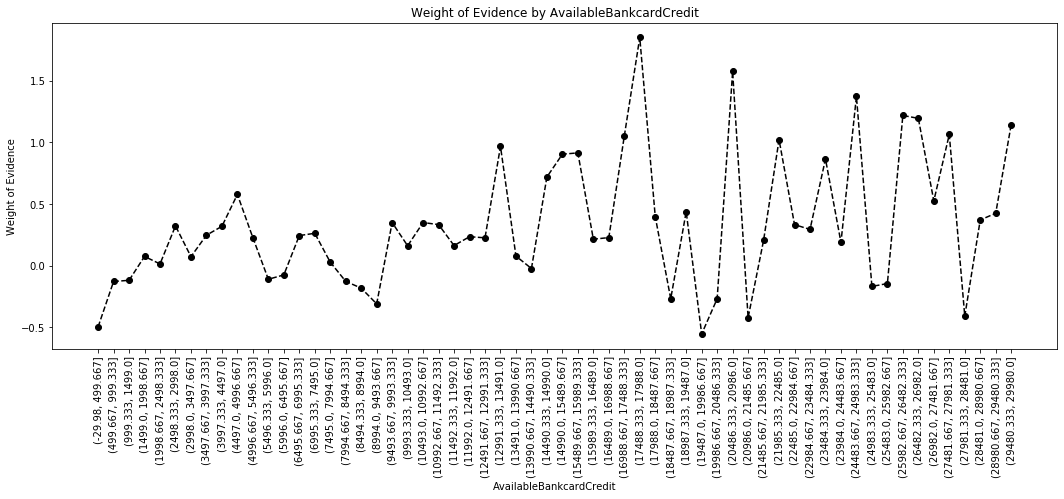

In [142]:
plot_by_woe(df_temp, 90)

In [143]:
df_inputs_prepr['AvailableBankcardCredit:<8.5k'] = np.where((df_inputs_prepr['AvailableBankcardCredit'] < 8500), 1, 0)
df_inputs_prepr['AvailableBankcardCredit:8.5k-15.5k'] = np.where((df_inputs_prepr['AvailableBankcardCredit'] > 8500) & (df_inputs_prepr['AvailableBankcardCredit'] <= 15500), 1, 0)
df_inputs_prepr['AvailableBankcardCredit:15.5k-21k'] = np.where((df_inputs_prepr['AvailableBankcardCredit'] > 15500) & (df_inputs_prepr['AvailableBankcardCredit'] <= 21000), 1, 0)
df_inputs_prepr['AvailableBankcardCredit:21k-25.5k'] = np.where((df_inputs_prepr['AvailableBankcardCredit'] > 21000) & (df_inputs_prepr['AvailableBankcardCredit'] <= 25500), 1, 0)
df_inputs_prepr['AvailableBankcardCredit:25.5k-30k'] = np.where((df_inputs_prepr['AvailableBankcardCredit'] > 25500) & (df_inputs_prepr['AvailableBankcardCredit'] <= 30000), 1, 0)
df_inputs_prepr['AvailableBankcardCredit>30k'] = np.where((df_inputs_prepr['AvailableBankcardCredit'] > 30000),1,0)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [144]:
df_inputs_prepr.columns

Index(['IncomeRange', 'IncomeVerifiable', 'IsBorrowerHomeowner',
       'DebtToIncomeRatio', 'AvailableBankcardCredit', 'EmploymentStatus',
       'LoanStatus', 'Term', 'LoanOriginalAmount', 'ProsperRating (Alpha)',
       'ProsperScore', 'BorrowerRate', 'CreditScoreRange', 'IncomeRange:$0',
       'IncomeRange:$1-24,999', 'IncomeRange:$100,000+',
       'IncomeRange:$25,000-49,999', 'IncomeRange:$50,000-74,999',
       'IncomeRange:$75,000-99,999', 'IncomeRange:Not employed',
       'EmploymentStatus:Employed', 'EmploymentStatus:Full-time',
       'EmploymentStatus:Not employed', 'EmploymentStatus:Other',
       'EmploymentStatus:Part-time', 'EmploymentStatus:Retired',
       'EmploymentStatus:Self-employed', 'CreditScoreRange:Exceptional (800+)',
       'CreditScoreRange:Fair (600-679)', 'CreditScoreRange:Good (680-739)',
       'CreditScoreRange:Very Good (740-799)', 'IncomeVerifiable:False',
       'IncomeVerifiable:True', 'IsBorrowerHomeowner:False',
       'IsBorrowerHomeowner:Tr

### Preprocessing the Test Dataset

- save processed train dataset by re-assigning df_inputs_prepr to loan_data_inputs_train
- 

In [150]:
#####
#loan_data_inputs_train = df_inputs_prepr
#####
loan_data_inputs_test = df_inputs_prepr

In [152]:
loan_data_inputs_train.head()

,IncomeRange,IncomeVerifiable,IsBorrowerHomeowner,DebtToIncomeRatio,AvailableBankcardCredit,EmploymentStatus,LoanStatus,Term,LoanOriginalAmount,ProsperRating (Alpha),ProsperScore,BorrowerRate,CreditScoreRange,IncomeRange:$0,"IncomeRange:$1-24,999","IncomeRange:$100,000+","IncomeRange:$25,000-49,999","IncomeRange:$50,000-74,999","IncomeRange:$75,000-99,999",IncomeRange:Not employed,EmploymentStatus:Employed,EmploymentStatus:Full-time,EmploymentStatus:Not employed,EmploymentStatus:Other,EmploymentStatus:Part-time,EmploymentStatus:Retired,EmploymentStatus:Self-employed,CreditScoreRange:Exceptional (800+),CreditScoreRange:Fair (600-679),CreditScoreRange:Good (680-739),CreditScoreRange:Very Good (740-799),IncomeVerifiable:False,IncomeVerifiable:True,IsBorrowerHomeowner:False,IsBorrowerHomeowner:True,ProsperRating (Alpha):A,ProsperRating (Alpha):AA,ProsperRating (Alpha):B,ProsperRating (Alpha):C,ProsperRating (Alpha):D,ProsperRating (Alpha):E,ProsperRating (Alpha):HR,EmploymentStatus:Other__self_employed__full_time,EmploymentStatus:Not_employed__part_time__retired,Term:12,Term:36,Term:60,ProsperScore:1,ProsperScore:2-5,ProsperScore:6-8,ProsperScore:9-11,BorrowerRateFactor,BorrowerRate:<0.111,"BorrowerRate:0.111, 0.188","BorrowerRate:0.188, 0.243",BorrowerRate:0.243-0.292,BorrowerRate:>0.292,LoanOriginalAmountFactor,LoanOriginalAmount:<7.5K,LoanOriginalAmount:7.5K-15K,LoanOriginalAmount:15K-20.4K,LoanOriginalAmount:20.4K-24.3k,LoanOriginalAmount>24.3k,DebtToIncomeRatioFactor,DebtToIncomeRatio:Missing,DebtToIncomeRatio:<0.088,DebtToIncomeRatio:0.088-0.244,DebtToIncomeRatio:0.244-0.296,DebtToIncomeRatio:0.296-0.4,DebtToIncomeRatio>0.4,AvailableBankcardCreditFactor,AvailableBankcardCredit:<8.5k,AvailableBankcardCredit:8.5k-15.5k,AvailableBankcardCredit:15.5k-21k,AvailableBankcardCredit:21k-25.5k,AvailableBankcardCredit:25.5k-30k,AvailableBankcardCredit>30k
53391,"$25,000-49,999",True,False,0.07,1645.0,Employed,Chargedoff,60,3500,E,8.0,0.3304,Fair (600-679),0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,"(0.325, 0.33]",0,0,0,0,1,NaN,1,0,0,0,0,"(-0.01, 0.2]",0,1,0,0,0,0,"(-498.374, 9967.48]",1,0,0,0,0,0
97026,"$100,000+",True,True,0.23,10704.0,Employed,Current,60,15000,A,7.0,0.1099,Good (680-739),0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,"(0.106, 0.111]",1,0,0,0,0,"(14000.7, 17000.6]",0,1,0,0,0,"(0.2, 0.4]",0,0,1,0,0,0,"(9967.48, 19934.96]",0,1,0,0,0,0
49497,"$100,000+",True,False,0.18,24063.0,Employed,Current,60,25000,A,11.0,0.1199,Very Good (740-799),0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,"(0.117, 0.122]",0,1,0,0,0,"(23000.4, 26000.3]",0,0,0,0,1,"(-0.01, 0.2]",0,0,1,0,0,0,"(19934.96, 29902.44]",0,0,0,1,0,0
23269,"$50,000-74,999",True,False,0.20,47304.0,Employed,Current,36,4000,D,2.0,0.2199,Good (680-739),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,"(0.215, 0.221]",0,0,1,0,0,NaN,1,0,0,0,0,"(-0.01, 0.2]",0,0,1,0,0,0,"(39869.92, 49837.4]",0,0,0,0,0,1
97575,"$50,000-74,999",True,False,0.12,2630.0,Employed,Current,60,15000,C,7.0,0.1760,Fair (600-679),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,"(0.172, 0.177]",0,1,0,0,0,"(14000.7, 17000.6]",0,1,0,0,0,"(-0.01, 0.2]",0,0,1,0,0,0,"(-498.374, 9967.48]",1,0,0,0,0,0


In [153]:
loan_data_inputs_test.head()

,IncomeRange,IncomeVerifiable,IsBorrowerHomeowner,DebtToIncomeRatio,AvailableBankcardCredit,EmploymentStatus,LoanStatus,Term,LoanOriginalAmount,ProsperRating (Alpha),ProsperScore,BorrowerRate,CreditScoreRange,IncomeRange:$0,"IncomeRange:$1-24,999","IncomeRange:$100,000+","IncomeRange:$25,000-49,999","IncomeRange:$50,000-74,999","IncomeRange:$75,000-99,999",IncomeRange:Not employed,EmploymentStatus:Employed,EmploymentStatus:Full-time,EmploymentStatus:Not employed,EmploymentStatus:Other,EmploymentStatus:Part-time,EmploymentStatus:Retired,EmploymentStatus:Self-employed,CreditScoreRange:Exceptional (800+),CreditScoreRange:Fair (600-679),CreditScoreRange:Good (680-739),CreditScoreRange:Very Good (740-799),IncomeVerifiable:False,IncomeVerifiable:True,IsBorrowerHomeowner:False,IsBorrowerHomeowner:True,ProsperRating (Alpha):A,ProsperRating (Alpha):AA,ProsperRating (Alpha):B,ProsperRating (Alpha):C,ProsperRating (Alpha):D,ProsperRating (Alpha):E,ProsperRating (Alpha):HR,EmploymentStatus:Other__self_employed__full_time,EmploymentStatus:Not_employed__part_time__retired,Term:12,Term:36,Term:60,ProsperScore:1,ProsperScore:2-5,ProsperScore:6-8,ProsperScore:9-11,BorrowerRateFactor,BorrowerRate:<0.111,"BorrowerRate:0.111, 0.188","BorrowerRate:0.188, 0.243",BorrowerRate:0.243-0.292,BorrowerRate:>0.292,LoanOriginalAmountFactor,LoanOriginalAmount:<7.5K,LoanOriginalAmount:7.5K-15K,LoanOriginalAmount:15K-20.4K,LoanOriginalAmount:20.4K-24.3k,LoanOriginalAmount>24.3k,DebtToIncomeRatioFactor,DebtToIncomeRatio:Missing,DebtToIncomeRatio:<0.088,DebtToIncomeRatio:0.088-0.244,DebtToIncomeRatio:0.244-0.296,DebtToIncomeRatio:0.296-0.4,DebtToIncomeRatio>0.4,AvailableBankcardCreditFactor,AvailableBankcardCredit:<8.5k,AvailableBankcardCredit:8.5k-15.5k,AvailableBankcardCredit:15.5k-21k,AvailableBankcardCredit:21k-25.5k,AvailableBankcardCredit:25.5k-30k,AvailableBankcardCredit>30k
2370,"$25,000-49,999",True,False,0.35,0.0,Employed,Current,36,2500,HR,4.0,0.3177,Fair (600-679),0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,"(0.314, 0.319]",0,0,0,0,1,NaN,1,0,0,0,0,"(0.21, 0.41]",0,0,0,0,1,0,"(-360.0, 7200.0]",1,0,0,0,0,0
100223,"$1-24,999",False,False,NaN,115.0,Self-employed,Current,60,12000,D,4.0,0.2610,Fair (600-679),0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,"(0.259, 0.265]",0,0,0,1,0,"(11080.0, 14070.0]",0,1,0,0,0,NaN,1,0,0,0,0,0,"(-360.0, 7200.0]",1,0,0,0,0,0
10788,"$50,000-74,999",True,True,0.42,12145.0,Employed,Current,36,15000,C,4.0,0.2015,Good (680-739),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,"(0.199, 0.204]",0,0,1,0,0,"(14070.0, 17060.0]",0,1,0,0,0,"(0.41, 0.61]",0,0,0,0,0,1,"(7200.0, 14400.0]",0,1,0,0,0,0
6783,"$75,000-99,999",True,False,0.13,200.0,Employed,Current,36,4000,B,8.0,0.1626,Fair (600-679),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,"(0.161, 0.166]",0,1,0,0,0,NaN,1,0,0,0,0,"(0.0, 0.21]",0,0,1,0,0,0,"(-360.0, 7200.0]",1,0,0,0,0,0
83922,"$75,000-99,999",True,False,0.18,378.0,Employed,Completed,36,4000,D,6.0,0.2287,Fair (600-679),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,"(0.226, 0.232]",0,0,1,0,0,NaN,1,0,0,0,0,"(0.0, 0.21]",0,0,1,0,0,0,"(-360.0, 7200.0]",1,0,0,0,0,0


In [154]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv',index=False)
loan_data_targets_train.to_csv('loan_data_targets_train.csv',index=False)
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv',index=False)
loan_data_targets_test.to_csv('loan_data_targets_test.csv',index=False)


In [155]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Forecasting credit risk using logistic regression.ipynb'])

0